In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 성일정보고등학교 학생 데이터
# 변수명 => SHD

In [22]:
SHD = pd.read_csv('data/1급-기밀파일.csv', encoding='cp949')
SHD.head(1)

,타임스탬프,학년,성별,학과,취미,개인공부시간,공부 시간대,기대연봉,학과 만족여부,전공 선호도,소셜미디어 사용시간,등교시간,하교시간,하교후 가는 곳,학업 스트레스,친구관계,알바,방과후 여부
0,2023. 10. 12 오후 12:21:46,2학년,남자,창업마케팅과,운동,1시간-2시간,방과후(저녁),3천만원,O,5,1시간-2시간,10-30분,18시 이후!,학원 또는 방과후,좋음,나쁨,X,O


# 정보고 학생 학년별 설문 참여도 (1학년 최고)

In [89]:
SHD.groupby('학년')['학년'].count()
# 학년별 설문조사 참여 수

학년
1학년    129
2학년    107
3학년     29
Name: 학년, dtype: int64

# 7개 학과별 설문 참여도 (전산계열 넘 고맙다)

In [94]:
SHD.groupby('학과')['학년'].count()

학과
금융경영과       28
부사관과        34
뷰티디자인과       5
소프트웨어개발과    97
스마트웹콘텐츠과    55
창업마케팅과      42
회계정보과        4
Name: 학년, dtype: int64

# 학과별에 따른 학년별 설문 참여도

In [61]:
SHD.groupby(['학년','학과'])[['학년']].count()

학년
학년  학과          
1학년 금융경영과     14
    부사관과      23
    소프트웨어개발과  44
    스마트웹콘텐츠과  25
    창업마케팅과    20
    회계정보과      3
2학년 금융경영과     11
    부사관과      11
    소프트웨어개발과  40
    스마트웹콘텐츠과  23
    창업마케팅과    22
3학년 금융경영과      3
    뷰티디자인과     5
    소프트웨어개발과  13
    스마트웹콘텐츠과   7
    회계정보과      1

# 학년별로 추출해 SHD_0 형식으로 변수 저장

In [95]:
SHD_1 = SHD[SHD['학년']=='1학년'] # 1학년 데이터만 추출(변수 저장)
SHD_2 = SHD[SHD['학년']=='2학년'] # 2학년 데이터만 추출(변수 저장)
SHD_3 = SHD[SHD['학년']=='3학년'] # 3학년 데이터만 추출(변수 저장)

# 그래프 예시 테스트

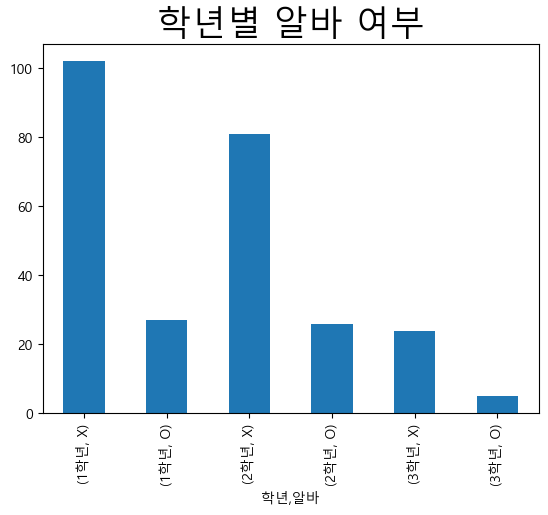

In [60]:
SHD.groupby('학년')['알바'].value_counts().plot(kind='bar') #학년 그룹 알바 컬럼 나열
plt.rc('font',family='Malgun Gothic') # 텍스트 한글 패치
plt.title('학년별 알바 여부', fontsize=25) # 제목 텍스트 크기
plt.show()

# 우리는 할 수 있다! 자신감을 가져~ 화이팅!!